# Les différentes structures de données utilisées pour les graphs

![graph examples](./images/graph_example.png)

### Comment **implémenter** un graph sur un ordinateur ?

Il existe plusieurs *data structures* qui permettent de représenter un graph dans un ordinateur.

In [1]:
# Imports :
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# La matrice d'adjacence :

On représente un graphe dans une matrice carrée de la même taille que le nombre de sommets.
- Les lignes donnent les successeurs de chaque sommets.
- Les colonnes donnent les prédecesseurs de chaque sommets.
- La matrice est contient `0` s'il n'y a pas d'arcs, `1` s'il y a un arc. On pourrait remplacer `0` par `False` et `1` par `True`

Exemple :
```
   0  1  2
0 [0, 1, 1]
1 [0, 0, 1]
2 [0, 1, 0]
```
- On voit qu'il y a un arc entre le sommet 0 et le sommet 1 (`matrix[0][1] == 1`)
- On voit qu'il n'y a pas d'arcs entre le sommet 2 et le sommet 1 (`matrix[2][0] == 0`)
- Le sommet 0 a pour successeurs les sommets `[1,2]`
- Le sommet 1 a pour prédécesseurs les sommets `[0,2]`
Le graphe :
<img src="images/adjacency_matrix_ex.png">

- Visuellement facile à comprendre
- Peut implémenter facilement des graphes valués en remplaçant les `1` par la valeur de l'arc

Une des pires data structures à utiliser, beaucoup de **space** et de **time** complexity
Complexité : $O(n^2)$


# La file des successeurs: (successor list)


La file des successeurs associe chaque sommets d'un *graph* avec ces successeurs ($d+$), par exemple :
```python
{0: [3], 1: [2, 3], 2: [3], 3: []}
```
- On voit qu'il y a 4 sommets `[0, 1, 2, 3]`
- Le sommet `0` a un successeur qui est `3` donc le graph a un arc (0,3)

Voici le *graph* correspondant à la file des successeurs exemple :
<img src="images/successor_list_example.png">


**Complexité** :

-
- Parfait pour Graph directionelle (orienté AKA avec des flèches)
- Pas de graphes valués possibles.

**Fast access**: The successor list allows for fast access to the outgoing edges of each vertex, making it an efficient data structure for algorithms that require traversal of the graph.

Dynamic: The successor list can be dynamically updated to add or remove edges from the graph, which is useful in situations where the graph changes frequently.

Non-uniform degree: The successor list can handle graphs with non-uniform vertex degrees, which means that some vertices can have more outgoing edges than others.

No edge weights: The successor list does not provide a natural way to store edge weights, although this can be addressed by storing additional data alongside the successor list.

More memory than adjacency list: The successor list uses more memory than an adjacency list for dense graphs, where each vertex has many outgoing edges, because it requires a separate list for each vertex.


In [2]:
class SuccessorList:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.successors = {i: [] for i in range(num_vertices)}

    def __str__(self):
        return str(self.successors)

    def add_edge(self, vertex1, vertex2):
        """
        Add an edge (link) from vertex1 to vertex2
        """
        self.successors[vertex1].append(vertex2)

    def get_successors(self, vertex):
        return self.successors[vertex]

successor_list= SuccessorList(4)
successor_list.add_edge(1,2)
successor_list.add_edge(1,3)
successor_list.add_edge(0,3)
successor_list.add_edge(2,3)
print(f"Les successeurs de 1 :  {successor_list.get_successors(1)}")
print(successor_list)

Les successeurs de 1 :  [2, 3]
{0: [3], 1: [2, 3], 2: [3], 3: []}


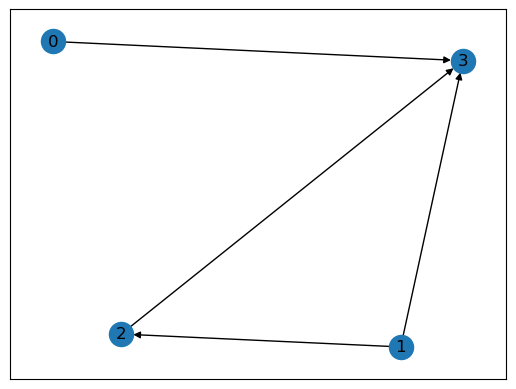

In [70]:
def successorList_to_Graph(successor_list : SuccessorList):
    return nx.DiGraph(successor_list.successors)

graph = successorList_to_Graph(successor_list)
nx.draw_networkx(graph)
# plt.savefig("C:\Users\kilap\DataspellProjects\graph_theory\images\successor_list_ex.png")
plt.show()

### Implémentation avec deux tableaux

Pour fonctionner plus rapidement on peut aussi implémenter la file des successeurs avec 2 tableaux :
- `alpha` : Tableau de taille  `n` (**`n` est le nombre de sommets**), chaque indice correspond à un sommet et le contenu du tableau est **l'indice de `beta` du premier successeur** de ce sommet.
- `beta` : Tableau de taille `m` (**`m` est le nombre d'arcs du graph**), contenant la liste des successeurs de chaque sommets.
Les successeurs d'un sommet i sont dans `beta` entre les indices `alpha[i]` et `alpha[i+1]`
Le nombre de successeurs d'un sommet i est `alpha[i+1] - alpha[i]`
Si un sommet n'a pas de successeurs alors `alpha[i] = alpha[i+1]`

Exemple :
```python
alpha = [0,0, 1, 1]
beta = [3]
```
Ici on voit que le sommet 2 n'a pas de successeurs car : `alpha[2+1] - alpha[2]`$ = 1 - 1 = 0$
Le sommet 1 a un successeurs car : `alpha[1+1] - alpha[1]`$ = 1 - 0 = 1$
Le successeur du sommet 1 se trouve dans beta à l'indice `alpha[1]`, soit `beta[0]` d'où le sommet 3 est un successeur de 1.


Voici une implémentation à deux tableaux de la liste des prédecesseurs, qui est analogue à la liste des successeurs.
> La manipulation de tableaux impose des `if` conditions peu lisibles pour gérer les indices et ne pas demander l'accès à des indices inexistants des list.

In [74]:
class PredecessorList:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.alpha=[0 for i in range(num_vertices)]
        self.beta=[]

    def __str__(self):
        return f"alpha : {str(self.alpha)}  | beta : {str(self.beta)}"

    def add_vertex(self, vertex):
        if vertex <= self.num_vertices:
            raise Exception("Error: adding a vertex that already exists")
        self.num_vertices+=1
        self.alpha.append(len(self.beta)-1) # last index of beta


    def add_edge(self, vertex1, vertex2):
        """
        Add edge from vertex1 to vertex2
        """
        index = vertex2 + 1
        if index == self.num_vertices:
            self.beta.append(vertex1)
            return
        self.beta.insert(self.alpha[index], vertex1)
        while index < len(self.alpha):
            self.alpha[index]+=1
            index += 1

    def get_predecessors(self, vertex):
        if self.get_num_predecessors(vertex) == 0:
            raise Exception("Error : Vertex doesn't have predecessors")
        if vertex + 1 == self.num_vertices :
            predecessor_range = range(self.alpha[vertex], len(self.beta))
        else:
            predecessor_range = range(self.alpha[vertex], self.alpha[vertex + 1])
        return [self.beta[i] for i in predecessor_range]

    def get_num_predecessors(self, vertex):
        if vertex + 1 == self.num_vertices:
            return len(self.beta) - self.alpha[vertex]
        return self.alpha[vertex + 1] - self.alpha[vertex]


predecessor_list = PredecessorList(4)
predecessor_list.add_edge(0, 1)
predecessor_list.add_edge(2, 1 )
predecessor_list.add_edge(0, 3)
predecessor_list.add_edge(2, 3)
predecessor_list.add_edge(3, 3)
print(f"Vertex 3 number of predecessors: {predecessor_list.get_num_predecessors(3)}")
print(f"Predecessors of vertex 3 : {predecessor_list.get_predecessors(3)}")
print(f"Predecessors of vertex 1 : {predecessor_list.get_predecessors(1)}")
print(predecessor_list)


Vertex 3 number of predecessors: 3
Predecessors of vertex 3 : [0, 2, 3]
Predecessors of vertex 1 : [0, 2]
alpha : [0, 0, 2, 2]  | beta : [0, 2, 0, 2, 3]
